In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.7.2


In [14]:
# TRAIN SET
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
metadata_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-0334f78f-56b4-4cf9-9523-ed4bcbbb6483',
    'IBM_API_KEY_ID': 'pYFJh7OpCiWMU7otFcsgf_n4t9VC81a2pmv-sfihVpdM',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'ibmnutritionanalyzer-donotdelete-pr-fwcxezjqoptgs6',
    'FILE': 'train.zip'
}

In [16]:
from ibm_botocore.client import Config
import ibm_boto3

cos = ibm_boto3.client(service_name='s3', 
ibm_api_key_id = metadata_1['IBM_API_KEY_ID'],
ibm_service_instance_id = metadata_1['IAM_SERVICE_ID'],
ibm_auth_endpoint = metadata_1['IBM_AUTH_ENDPOINT'],
config = Config(signature_version = 'oauth'),
endpoint_url = metadata_1['ENDPOINT'])

In [19]:
cos.download_file(Bucket = metadata_1['BUCKET'], Key='train.zip', Filename = 'train.zip')

In [20]:
from zipfile import ZipFile

with ZipFile('train.zip','r') as zipObj:
    zipObj.extractall()

In [21]:
import os
os.listdir("./train")

['pumpkin',
 'bean',
 'ginger',
 'chilli pepper',
 'watermelon',
 'onion',
 'pomegranate',
 'potato',
 'lettuce',
 'mutton',
 'raddish',
 'pineapple',
 'sweetpotato',
 'garlic',
 'grapes',
 'lemon',
 'paprika',
 'turnip',
 'apple',
 'jalepeno',
 'soy beans',
 'fish',
 'bottle gourd',
 'bellpepper',
 'bitter gourd',
 'carrot',
 'cucumber',
 'broccoli',
 'corn',
 'pear',
 'beetroot',
 'orange',
 'tomato',
 'kiwi',
 'cabbage',
 'sweetcorn',
 'cauliflower',
 'mango',
 'banana',
 'papaya',
 'egg',
 'peas',
 'capsicum',
 'chicken',
 'eggplant',
 'spinach']

In [22]:
# TEST SET
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
metadata_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-0334f78f-56b4-4cf9-9523-ed4bcbbb6483',
    'IBM_API_KEY_ID': 'pYFJh7OpCiWMU7otFcsgf_n4t9VC81a2pmv-sfihVpdM',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'ibmnutritionanalyzer-donotdelete-pr-fwcxezjqoptgs6',
    'FILE': 'test.zip'
}

In [23]:
from ibm_botocore.client import Config
import ibm_boto3

cos = ibm_boto3.client(service_name='s3', 
ibm_api_key_id = metadata_2['IBM_API_KEY_ID'],
ibm_service_instance_id = metadata_2['IAM_SERVICE_ID'],
ibm_auth_endpoint = metadata_2['IBM_AUTH_ENDPOINT'],
config = Config(signature_version = 'oauth'),
endpoint_url = metadata_2['ENDPOINT'])

In [24]:
cos.download_file(Bucket = metadata_2['BUCKET'], Key='test.zip', Filename = 'test.zip')

In [25]:
from zipfile import ZipFile

with ZipFile('test.zip','r') as zipObj:
    zipObj.extractall()

In [30]:
import os
os.listdir("./test/pumpkin")

['1002.jpg',
 '1001.jpg',
 '1007.jpg',
 '1006.jpg',
 '1003.jpg',
 '1008.jpg',
 '1009.jpg',
 '1010.jpg',
 '1005.jpg',
 '1004.jpg']

In [28]:
train_dir = Path('./train')
train_filepaths = list(train_dir.glob(r'**/*.*'))

test_dir = Path('./test')
test_filepaths = list(test_dir.glob(r'**/*.*'))

In [37]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [39]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)

In [41]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 4223

Number of different labels: 46

Labels: ['onion' 'chilli pepper' 'eggplant' 'ginger' 'pomegranate' 'spinach'
 'watermelon' 'carrot' 'mutton' 'apple' 'fish' 'tomato' 'jalepeno'
 'capsicum' 'mango' 'bean' 'garlic' 'broccoli' 'lettuce' 'potato'
 'bottle gourd' 'beetroot' 'pineapple' 'bellpepper' 'paprika' 'pumpkin'
 'soy beans' 'peas' 'cucumber' 'turnip' 'egg' 'raddish' 'lemon' 'pear'
 'chicken' 'orange' 'cauliflower' 'corn' 'bitter gourd' 'kiwi' 'papaya'
 'banana' 'cabbage' 'sweetcorn' 'sweetpotato' 'grapes']


In [42]:
train_df.head(5)

,Filepath,Label
0,train/onion/Image_84.jpg,onion
1,train/chilli pepper/Image_91.jpg,chilli pepper
2,train/eggplant/Image_16.jpg,eggplant
3,train/ginger/Image_18.jpg,ginger
4,train/pomegranate/Image_7.jpg,pomegranate


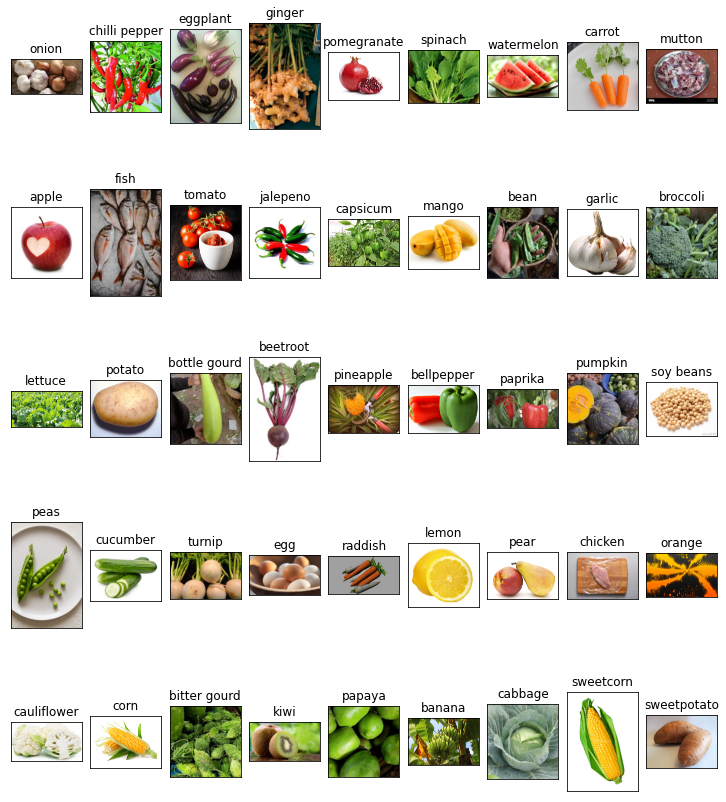

In [43]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

fig, axes = plt.subplots(nrows=5, ncols=9, figsize=(10, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [44]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [45]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 4223 validated image filenames belonging to 46 classes.


In [47]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 477 validated image filenames belonging to 46 classes.


In [48]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [54]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(46, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=test_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
  2/132 [..............................] - ETA: 4:29 - loss: 3.9150 - accuracy: 0.0312 

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


132/132 [==============================] - 300s 2s/step - loss: 1.5084 - accuracy: 0.6109 - val_loss: 0.4428 - val_accuracy: 0.8763
Epoch 2/5
132/132 [==============================] - 284s 2s/step - loss: 0.4513 - accuracy: 0.8612 - val_loss: 0.2671 - val_accuracy: 0.9182
Epoch 3/5
132/132 [==============================] - 285s 2s/step - loss: 0.2698 - accuracy: 0.9143 - val_loss: 0.2639 - val_accuracy: 0.9140
Epoch 4/5
132/132 [==============================] - 292s 2s/step - loss: 0.1975 - accuracy: 0.9399 - val_loss: 0.2330 - val_accuracy: 0.9371
Epoch 5/5
132/132 [==============================] - 295s 2s/step - loss: 0.1231 - accuracy: 0.9628 - val_loss: 0.1921 - val_accuracy: 0.9476


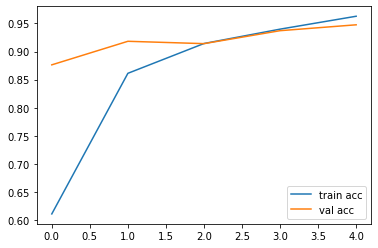

In [55]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [56]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

['onion',
 'apple',
 'spinach',
 'pineapple',
 'grapes',
 'spinach',
 'pomegranate',
 'broccoli',
 'beetroot',
 'pomegranate',
 'orange',
 'turnip',
 'peas',
 'sweetcorn',
 'sweetpotato',
 'eggplant',
 'pomegranate',
 'bitter gourd',
 'papaya',
 'corn',
 'mango',
 'pineapple',
 'pear',
 'cabbage',
 'carrot',
 'fish',
 'fish',
 'bellpepper',
 'corn',
 'lettuce',
 'cabbage',
 'lemon',
 'pear',
 'bitter gourd',
 'bottle gourd',
 'banana',
 'bitter gourd',
 'lemon',
 'potato',
 'carrot',
 'soy beans',
 'soy beans',
 'raddish',
 'tomato',
 'onion',
 'egg',
 'jalepeno',
 'pomegranate',
 'chicken',
 'spinach',
 'carrot',
 'lettuce',
 'potato',
 'kiwi',
 'spinach',
 'tomato',
 'peas',
 'paprika',
 'mango',
 'banana',
 'kiwi',
 'orange',
 'orange',
 'egg',
 'corn',
 'chicken',
 'broccoli',
 'bellpepper',
 'beetroot',
 'watermelon',
 'banana',
 'egg',
 'raddish',
 'carrot',
 'bean',
 'mutton',
 'peas',
 'chicken',
 'chicken',
 'grapes',
 'bitter gourd',
 'turnip',
 'watermelon',
 'eggplant',
 'k

In [51]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [54]:
img = output('D:/fv/fvclass/test/cabbage/Image_1.jpg')
img

1/1 [==============================] - 1s 839ms/step


'cabbage'

In [55]:
model.save('FV.h5')

In [57]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score 
cm = confusion_matrix(test_images.classes, pred)  
cm

array([[ 8,  0,  0, ...,  0,  0,  0],
       [ 0,  7,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0, 10]])

In [58]:
ps = precision_score(test_images.classes, pred, average='weighted')
print("PRECISION SCORE : ",ps)
rs = recall_score(test_images.classes, pred, average='weighted')
print("RECALL SCORE : ",rs) 
fs = f1_score(test_images.classes, pred, average='weighted')
print("F1 SCORE : ",fs) 

PRECISION SCORE :  0.952140452140452
RECALL SCORE :  0.9475890985324947
F1 SCORE :  0.9454436033097522


<AxesSubplot:>

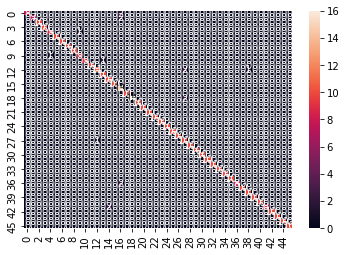

In [58]:
import seaborn as sns
sns.heatmap(cm,annot=True)